# Big Mountain resort Step 6. Documentation

**The Data Science Method**  


1.   Problem Identification 

2.   Data Wrangling 
  
3.   Exploratory Data Analysis 
 
4.   Pre-processing and Training Data Development

5.  Modeling

6.   **Documentation**
  * Review the Results
  * Finalize Code 
  * Finalize Documentation
  * Create a Project Report 
  * Create a Slide Deck for the Executive Audience

**<font color='teal'> Load the packages and print out the current working directory. </font>**

In [1]:
import os
import pandas as pd
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
os.listdir()

['BigMountainStep4 and5-overfitting.ipynb',
 'Screen Shot 2020-07-19 at 10.56.26 PM.png',
 'BigMountainStep4.ipynb',
 'Screen Shot 2020-07-19 at 10.12.55 PM.png',
 '.DS_Store',
 'BigMountainStep6Documentation.ipynb',
 'BigMountainStep5.ipynb',
 'BigMountainStep6Documentation-Copy1.ipynb',
 'BigMountainStep3.ipynb',
 'Big Mountain Resort Reports',
 'Step 2',
 '.ipynb_checkpoints',
 '[Zora Hsu]PSW-Guided Capstone.key']

## Fit Models with Training Dataset

**<font color='teal'> Using sklearn to fit the model chosen in step 5 on the training dataset. Also, generate a model performance score(MAE, or explained variance) based on the testing hold-out dataset.</font>**

#### Best Model 

**<font color='teal'> Load the sklearn packages and csv file. </font>**

In [2]:
from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import explained_variance_score,mean_absolute_error
path='/Users/zora/Desktop/springboard/Unit 6/Step 2'
os.chdir(path)
df = pd.read_csv('step2_output.csv', index_col=0)
df.shape

(330, 27)

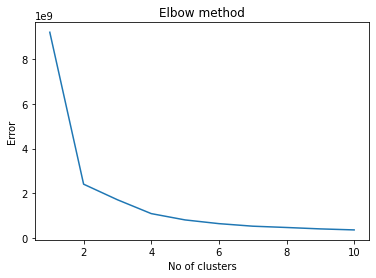

In [3]:
x = df.drop(['Name','state','Region'], axis =1).values
Error =[]
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i).fit(x)
    kmeans.fit(x)
    Error.append(kmeans.inertia_)
plt.plot(range(1, 11), Error)
plt.title('Elbow method')
plt.xlabel('No of clusters')
plt.ylabel('Error')
plt.show()

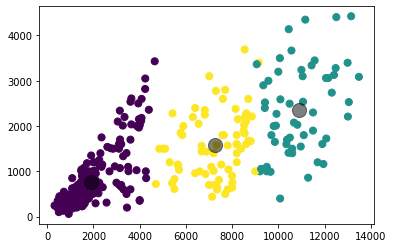

In [4]:
kmeans3 = KMeans(n_clusters=3)
y_kmeans3 = kmeans3.fit_predict(x)
plt.scatter(x[:, 0], x[:, 1], c=y_kmeans3, s=50, cmap='viridis')

centers = kmeans3.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

In [5]:
df['clusters'] = y_kmeans3

#### Standardize the magnitude of numeric features

In [6]:
X = df.drop(['Name','AdultWeekend','state','summit_elev','base_elev','Region'], axis=1)
y = df.AdultWeekend
scaler = preprocessing.StandardScaler().fit(X)
X_scaled = scaler.transform(X) 

#### Split into training and testing datasets

In [7]:
y = y.ravel()
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=1)

#### Fit machine learning model with the training dataset

In [8]:
lm = linear_model.LinearRegression()
model = lm.fit(X_train,y_train)

In [9]:
y_pred = model.predict(X_test)
model_score = model.score(X_test, y_test)
print('The model score is ' + str(model_score))

The model score is 0.9308777764522097


#### Review model outcomes

In [10]:
evs = explained_variance_score(y_test, y_pred)
print('Explained variance score (evs) is ' + str(evs))
mae = mean_absolute_error(y_test, y_pred)
print('Mean absolute error (mae) is ' + str(mae))

Explained variance score (evs) is 0.9310813115277904
Mean absolute error (mae) is 5.273938747930753


**<font color='teal'> The intercept value from the linear model. </font>**

The intercept is the mean AdultWeekend price for all the resorts given the other characteristics. 

In [11]:
print('The intercept value is ' + str(lm.intercept_))

The intercept value is 64.07307104792082


**<font color='teal'>  The top ten most important features. </font>**

Compare each of the coeeficients for the features to determine the feature importances.

In [12]:
df_coef = pd.DataFrame(abs(lm.coef_), X.columns, columns=['Coefficient'])
top10 = df_coef.sort_values(by=['Coefficient'], ascending=False).head(10)
print(top10)

                  Coefficient
AdultWeekday        19.923313
vertical_drop        1.799920
Runs                 1.720738
quad                 1.531823
triple               1.442502
averageSnowfall      1.430515
clusters             1.344275
surface              1.282339
daysOpenLastYear     0.973553
fastQuads            0.820464


## Review the results 

**<font color='teal'> Now, let's predict the Big Mountain Weekend price with the model in order to provide a recommendation to the managers on how to price the `AdultWeekend` lift ticket. First, find the row for Big Mountain resort in the dataset.</font>**

In [13]:
big_mountain = df[df['Name'].str.contains('Big Mountain')]
big_mountain

,Name,Region,state,summit_elev,vertical_drop,base_elev,trams,fastEight,fastSixes,fastQuads,...,SkiableTerrain_ac,Snow Making_ac,daysOpenLastYear,yearsOpen,averageSnowfall,AdultWeekday,AdultWeekend,projectedDaysOpen,NightSkiing_ac,clusters
151,Big Mountain Resort,Montana,Montana,6817,2353,4464,0,0.0,0,3,...,3000.0,600.0,123.0,72.0,333.0,81.0,81.0,123.0,600.0,2


**<font color='teal'> Prepare the Big Mountain resort data row.</font>**

In [14]:
BM_X = df[df['Name'].str.contains('Big Mountain')].drop(['Name','AdultWeekend','state','summit_elev','base_elev','Region'], axis=1)
BM_scaled = scaler.transform(BM_X)
BM_y = y.ravel()

The `expected` adult weekend lift price to present to management. Based on the model given the characteristics of the resort in comparison to other ski resorts and their unique characteristics.

In [15]:
BM_pred = model.predict(BM_scaled)
print ('The expected Big Mountain Resort adult weekend price is $' + str(BM_pred[0].round(2)))

The expected Big Mountain Resort adult weekend price is $88.2


The `actual` Big Mountain resort adult weekend lift price.

In [16]:
ac = df[df['Name'].str.contains('Big Mountain')]
BM_ac = ac.AdultWeekend.to_list()[0]
print ('The actual Big Mountain Resort adult weekend price is $' + str(BM_ac))

The actual Big Mountain Resort adult weekend price is $81.0


## Data Visualization 

As part of reviewing the results it is an important step to generate figures to visualize the data story. Use the clusters that added to the data frame to create scatter plots for visualizing the Adult Weekend values compared to other characteristics. Build three figures to include in the data story telling.

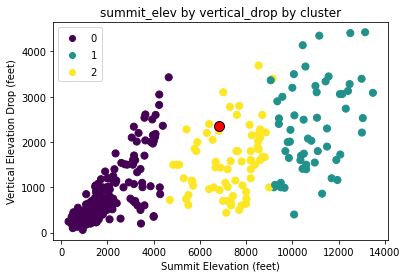

In [17]:
#figure 1
ax = plt.scatter(df['summit_elev'], df['vertical_drop'], c=df['clusters'], s=50, cmap='viridis', label ='clusters')
plt.scatter(ac['summit_elev'], ac['vertical_drop'], c='red', edgecolors='black', s=100)
plt.legend(*ax.legend_elements())
plt.xlabel('Summit Elevation (feet)')
plt.ylabel('Vertical Elevation Drop (feet)')
plt.title('summit_elev by vertical_drop by cluster')
plt.savefig('figures/fig1.png',bbox_inches='tight')

#### Figure 1 Description:
Three clusters are divided based on their factors, property, and related data, each cluster is separated by summit elevation level. Cluster 0:'purple' is plotted on summit_elev below 5,000 and vertical_drop below 4,000. Cluster 1:'yellow' is plotted between summit_elev 4,000 and 9,000, between vertical_drop 4,000 and around 500. Cluster 2:'green' is plotted over summit_elev 9,000 and vertical_drop over around 500. 
The red dot shows the Big Mountain resort, which falls in the mid-range of the summit elevation by vertical elevation drop.

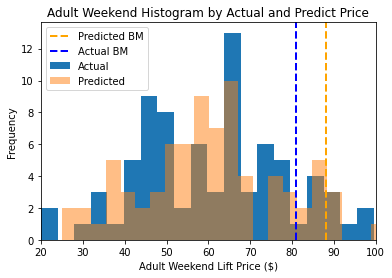

In [18]:
#figure 2
plt.hist(y_test, bins = 40, label='Actual')
plt.hist(y_pred, bins = 40, alpha = 0.5, label='Predicted')
plt.xlim(20,100)
plt.axvline(BM_pred, color='orange', linewidth=2, linestyle = '--', label = "Predicted BM")
plt.axvline(BM_ac, color='blue', linewidth=2, linestyle = '--', label = "Actual BM")
plt.legend()
plt.xlabel('Adult Weekend Lift Price ($)')
plt.ylabel('Frequency')
plt.title('Adult Weekend Histogram by Actual and Predict Price')
plt.savefig('figures/fig2.png',bbox_inches='tight');

#### Figure 2 Description:
The blue and orange bars represent actual and predicted values of adult weekend prices in the linear regression model. The blue dashed line is the actual value of the Big Mountain resort. Compared to other resorts, it is positioned as a high-end product. The orange dashed line is the predicted value, indicating that we should price it even higher, possibly as high as around $90.

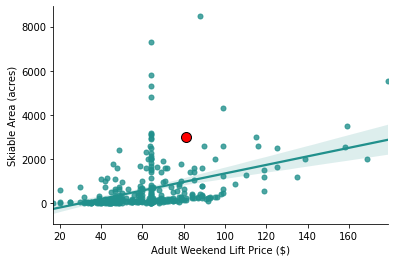

In [19]:
#figure 3
sns.regplot(x="AdultWeekend", y="SkiableTerrain_ac", data=df[(df['SkiableTerrain_ac'] < 25000)], color ="#21908CFF",scatter_kws={"s": 25})
plt.scatter(x="AdultWeekend", y="SkiableTerrain_ac", data=ac, c='red',s=100, edgecolors='black')
sns.despine()
plt.xlabel('Adult Weekend Lift Price ($)')
plt.ylabel('Skiable Area (acres)')
plt.savefig('figures/fig3.png',bbox_inches='tight')

#### Figure 3 Description:
The scatterplot shows that the adult weekend lift prices are proportional to the skiable area. The red dot shows the Big Mountain resort. For the price point, the Big Mountain resort offers roughly 3 times the value for skiable area. 

An interesting discovery from this figure, the range of the skiable areas are extremely large around the average price point, approx. 8,000 acres difference. A lot of resorts set their prices at around the average price point, which is $64. This means that most resorts under estimate their potential ticket price. This illustrates the importance of letting data scientists predict prices.

## Finalize Code

In [20]:
import pickle
s = pickle.dumps(model)
from joblib import dump, load
dump(model, 'models/regression_model_adultweekend.joblib') 

['models/regression_model_adultweekend.joblib']

## Finalize Documentation

Save the model performance metrics as well as the features included in the final model. 

In [21]:
coeff_df = pd.DataFrame(abs(lm.coef_), X.columns, columns=['Coefficient'])  
coeff_df['MAE'] = mean_absolute_error(y_test, y_pred)
coeff_df['ExpVar'] = explained_variance_score(y_test, y_pred)
coeff_df.to_csv('models/model_metrics.csv',index=False)